In [1]:
#1. Mnaually downloading DATASET

import re
import sys
import time
import datetime
import requests

def split_crumb_store(v):
    return v.split(':')[2].strip('"')

def find_crumb_store(lines):
    for l in lines:
        if re.findall(r'CrumbStore', l):
            return l
    print("Did not find CrumbStore")

def get_cookie_value(r):
    return {'B': r.cookies['B']}

def get_page_data(symbol):
    url = "https://finance.yahoo.com/quote/%s/?p=%s" % (symbol, symbol)
    r = requests.get(url)
    cookie = get_cookie_value(r)

    lines = r.content.decode('unicode-escape').strip(). replace('}', '\n')
    return cookie, lines.split('\n')

def get_cookie_crumb(symbol):
    cookie, lines = get_page_data(symbol)
    crumb = split_crumb_store(find_crumb_store(lines))
    return cookie, crumb

def get_data(symbol, start_date, end_date, cookie, crumb):
    filename = '%s.csv' % (symbol)
    url = "https://query1.finance.yahoo.com/v7/finance/download/%s?period1=%s&period2=%s&interval=1d&events=history&crumb=%s" % (symbol, start_date, end_date, crumb)
    response = requests.get(url, cookies=cookie)
    with open (filename, 'wb') as handle:
        for block in response.iter_content(1024):
            handle.write(block)

def get_now_epoch():
   
    return int(time.time())

def download_quotes(symbol):
    start_date = 0
    end_date = get_now_epoch()
    cookie, crumb = get_cookie_crumb(symbol)
    get_data(symbol, start_date, end_date, cookie, crumb)

if __name__ == '__main__':
    
    SYMBOL=input("Enter the symbol for dataset download ")
    download_quotes(SYMBOL)
    print("Downlod completed, check parent folder")


Enter the symbol for dataset download TSLA


C:\Users\Shireen\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: invalid escape sequence '\/'


Downlod completed, check parent folder


In [2]:
#2. Data from a period of time and a Particular date

from pandas_datareader import data as dreader
import datetime
start=datetime.datetime(2010, 1, 1)
end=datetime.datetime.today()
i=input("Enter the symbol: ")
#a=input("Particular date or period of time")
    #swicth case [Enter date] or [Enter start date and end date]
#d=input("Enter the date: 'YYYY-MM-DD' : ")
   #Whether need full data or particular like - Open rates only or Closing rates etc
f=dreader.DataReader(i, "yahoo", start, end)
#f.loc[]
print(f.tail())

Enter the symbol: TWTR
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2018-04-17  29.450001  32.060001  29.430000  31.840000  31.840000  46696000
2018-04-18  31.670000  32.060001  31.070000  31.540001  31.540001  25140000
2018-04-19  31.370001  32.279999  30.959999  31.540001  31.540001  22640100
2018-04-20  32.650002  33.119999  31.650000  31.910000  31.910000  34819700
2018-04-23  32.509998  32.619999  30.850000  31.219999  31.219999  29288200


In [3]:
#3. Virtually working on dataset - Not downloading

from pandas_datareader import data as dreader
symbols = ['MSFT']
pnls = {i:dreader.DataReader(i,'yahoo','2016-09-01','2018-03-31') for i in symbols}
print(pnls.get('MSFT').head())
print(pnls.get('MSFT').tail())

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2016-08-31  57.650002  57.799999  57.299999  57.459999  55.566845  20860300
2016-09-01  57.009998  57.820000  57.009998  57.590000  55.692562  26075400
2016-09-02  57.669998  58.189999  57.419998  57.669998  55.769920  18900500
2016-09-06  57.779999  57.799999  57.209999  57.610001  55.711903  16278400
2016-09-07  57.470001  57.840000  57.410000  57.660000  55.760258  17493400
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2018-03-23  89.500000  90.459999  87.080002  87.180000  87.180000  44068900
2018-03-26  90.610001  94.000000  90.400002  93.779999  93.779999  56396800
2018-03-27  94.940002  95.139999  88.510002  89.470001  89.470001  56569000
2018-03-28  89.820000  91.230003  88.870003  89.389999  89.389999  52501100
2018-03-29  

In [4]:
#4. Describing the data - stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sales=pd.read_csv("TSLA.csv",parse_dates=['Date'])
sales.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1.968000e+03
mean,159.918526,162.606189,157.060645,159.892414,159.892414,4.622237e+06
std,111.273752,112.812067,109.583787,111.239153,111.239153,4.255604e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,31.755000,32.344999,30.985000,31.697501,31.697501,1.377825e+06
50%,193.580001,197.065002,189.775002,193.690002,193.690002,3.756300e+06
75%,242.587502,246.690002,238.437500,242.702496,242.702496,6.160800e+06
max,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07


In [5]:
#5. Visualizing the data

import plotly.plotly as py                   #YEAR????
py.sign_in('shereenfathima1206','GhXBRqlDgv9q87VWhWth')
import plotly.graph_objs as go
import pandas as pd
df = pd.read_csv("TSLA.csv")
data = [go.Scatter(
          x=df.Date,
          y=df.Close)]
py.iplot(data)

In [6]:
#6. visualization and comparison - all time high low margin

import plotly.plotly as py #RUNTIME

py.sign_in('shereenfathima1206','GhXBRqlDgv9q87VWhWth')

import plotly.graph_objs as go
import pandas as pd
df = pd.read_csv("TSLA.csv")
trace_high = go.Scatter(
                x=df.Date,
                y=df.High,
                name = "TSLA High",
                line = dict(color = '#17BECF'),
                opacity = 0.8)
trace_low = go.Scatter(
                x=df.Date,
                y=df.Low,
                name = "TSLA Low",
                line = dict(color = '#7F7F7F'),
                opacity = 0.8)
data = [trace_high,trace_low]
layout = dict(
    title = "Manually Set Date Range",
    xaxis = dict(
        range = ['2017-01-01','2018-03-31'])
)
fig = dict(data=data, layout=layout)
py.iplot(fig, filename = "Manually Set Range")

                    FB         GOOG        TSLA
Date                                           
2018-04-17  168.660004  1074.160034  287.690002
2018-04-18  166.360001  1072.079956  293.350006
2018-04-19  168.100006  1087.699951  300.079987
2018-04-20  166.279999  1072.959961  290.239990
2018-04-23  165.839996  1067.449951  283.369995


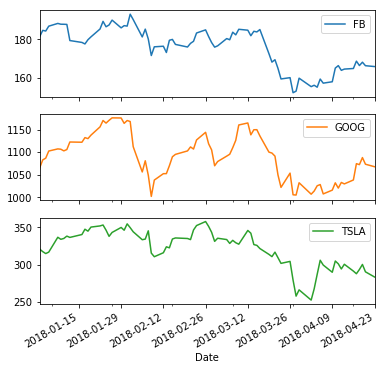

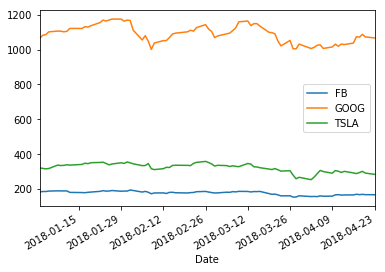

In [7]:
#7. comparison of multiple stocks

import pandas as pd
from pandas_datareader import data, wb
import datetime
import matplotlib.pyplot as plt  

start = datetime.datetime(2018,1,1)
end = datetime.date.today()
a1 = data.DataReader("FB", "yahoo", start, end)
#print(a1.head())
m1 = data.DataReader("TSLA", "yahoo", start, end)
#print(m1.head())
g1 = data.DataReader("GOOG", "yahoo", start, end)
#print(g1.head())

stocks = pd.DataFrame({"FB": a1["Adj Close"],
                      "TSLA": m1["Adj Close"],
                      "GOOG": g1["Adj Close"]})
 
print(stocks.tail())

#stocks.plot()
stocks.plot(subplots=True, figsize=(6, 6));
stocks.plot()

In [29]:
#STOCK PREDICTION

Enter the symbol......................TSLA
Enter the Starting Date(yyyy/mm/dd)....2018/01/01
Enter the Ending Date(yyyy/mm/dd)......2018/05/13
file name
TSLAGraph.csv
God Bless
Dates-  [2, 3, 4, 5, 8, 9, 10, 11, 12, 16, 17, 18, 19, 22, 23, 24, 25, 26, 29, 30, 31, 1, 2, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 20, 21, 22, 23, 26, 27, 28, 1, 2, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 19, 20, 21, 22, 23, 26, 27, 28, 29, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 23, 24, 25, 26, 27, 30, 1, 2, 3, 4, 7, 8, 9, 10, 11]
Prices-  [312.0, 321.0, 312.869995, 316.619995, 316.0, 335.160004, 332.200012, 335.23999, 338.630005, 337.540009, 340.47000099999997, 345.670013, 345.0, 349.399994, 360.0, 354.579987, 348.269989, 341.5, 339.850006, 345.140015, 347.51001, 351.0, 348.440002, 337.97000099999997, 325.209991, 338.98999, 343.309998, 319.929993, 316.130005, 315.019989, 320.839996, 324.5, 332.5, 334.47000099999997, 336.02999900000003, 335.52999900000003, 347.829987, 353.5, 356.25, 352.570007, 345.01001,

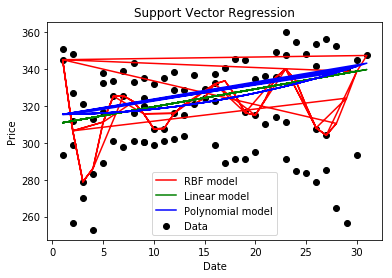


The stock open price prediction for 29 day interval is:
RBF kernel: $ 324.2595043784883
Linear kernel: $ 337.8615384609751
Polynomial kernel: $ 339.7500051934513


In [2]:
#Model 1: SVR MODEL

import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from pandas_datareader import data as dreader
import datetime
import pandas as pd
from sklearn.metrics import accuracy_score
from pandas_datareader import data, wb

dates = []
prices = []
def get_data(filename):
    with open(filename, 'r') as csvfile:
        csvFileReader = csv.reader(csvfile)
        next(csvFileReader)    # skipping column names
        for row in csvFileReader:
            dates.append(int(row[0].split('-')[2]))
            prices.append(float(row[1]))
    return
def predict_price(dates, prices, x):
    dates = np.reshape(dates,(len(dates), 1)) # converting to matrix of n X 1
    svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1) 
    svr_lin = SVR(kernel= 'linear', C= 1e3) #penalty error for 1000 
    svr_poly = SVR(kernel= 'poly', C= 1e3, degree= 2)
    svr_rbf.fit(dates, prices) # fitting the data points in the models
    svr_lin.fit(dates, prices)
    svr_poly.fit(dates, prices)
    plt.scatter(dates, prices, color= 'black', label= 'Data') 
    plt.plot(dates, svr_rbf.predict(dates), color= 'red', label= 'RBF model') 
    plt.plot(dates,svr_lin.predict(dates), color= 'green', label= 'Linear model') 
    plt.plot(dates,svr_poly.predict(dates), color= 'blue', label= 'Polynomial model') 
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()
    return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0]

def SvrGraph():
  
    SYMBOL=input("Enter the symbol......................")
    sdate=input("Enter the Starting Date(yyyy/mm/dd)....")
    edate=input("Enter the Ending Date(yyyy/mm/dd)......")
    start= datetime.datetime.strptime(sdate, '%Y/%m/%d')
    end= datetime.datetime.strptime(edate, '%Y/%m/%d')
    
    data.DataReader(SYMBOL, 'yahoo', start, end).to_csv(SYMBOL+'Graph.csv')
    a=SYMBOL+'Graph.csv'
    print("file name")
    print(a)
    get_data(a) # calling get_data method by passing the csv file to it
    print("God Bless")
    print ("Dates- ", dates)
    print ("Prices- ", prices)
    predicted_price = predict_price(dates, prices, 29) 
    print ("\nThe stock open price prediction for 29 day interval is:")
    print ("RBF kernel: $", str(predicted_price[0]))
    print ("Linear kernel: $", str(predicted_price[1]))
    print ("Polynomial kernel: $", str(predicted_price[2]))
    
SvrGraph()




C:\Users\Shireen\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Enter the symbol: TSLA
Prediction accuracy 0.9611351109650073
forecast set [291.01458898 288.40903632 292.90819947 298.8127881  289.42201155
 282.26794249 283.22160643 279.03643836 283.61307244 291.64338579
 292.32681787 298.19375484 303.48082367 294.90328022 294.46714786
 304.38386952 301.3058112  306.11523396 303.98499127 299.02340456]


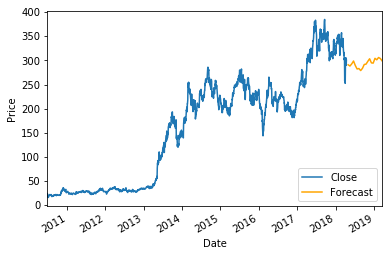

In [3]:
#Model 2: Linear Regression

#Turorial - https://pythonprogramming.net/forecasting-predicting-machine-learning-tutorial/

#import quandl, math
from pandas_datareader import data, wb
import numpy as np
import pandas as pd
from sklearn import preprocessing, cross_validation, svm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
#from matplotlib import style
import datetime
import math

#style.use('ggplot')

#quandl.ApiConfig.api_key = "6jYAJkMRjUMouMriutYq"
#df = quandl.get('shereenfathima1206', authtoken='6jYAJkMRjUMouMriutYq')
tickers = input("Enter the symbol: ")
data_source = 'yahoo'
df = data.DataReader(tickers, data_source)
df.drop('Adj Close', axis=1)

df = df[['Open',  'High',  'Low',  'Close', 'Volume']]
df['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
df['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
#print(df['HL_PCT'].tail())
#print(df['PCT_change'].tail())

df = df[['Close', 'HL_PCT', 'PCT_change', 'Volume']]

forecast_col = 'Close' #to predict
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)

X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)

y = np.array(df['label'])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print('Prediction accuracy', confidence)

forecast_set = clf.predict(X_lately)
df['Forecast'] = np.nan #add new col in th existing dataset
print('forecast set', forecast_set)
#print('forecast out', forecast_out)

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
two_week = 1.469e+6 #1.21e+6
next_unix = last_unix + two_week

for i in forecast_set: #populate new empty col with forecasted data
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 1.469e+6 #1.21e+6
    #Time in seconds 1D = 86400 seconds
    #864000 - 10 days 
    #1.21e+6 - 14 days -- 2 weeks
    #1.296e+6 - 15 days doesnt work >=18
    #1.469e+6 - 17 days
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]   

df['Close'].plot()
df['Forecast'].plot(color='orange')
plt.legend(loc=4) #4 
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


C:\Users\Shireen\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  """


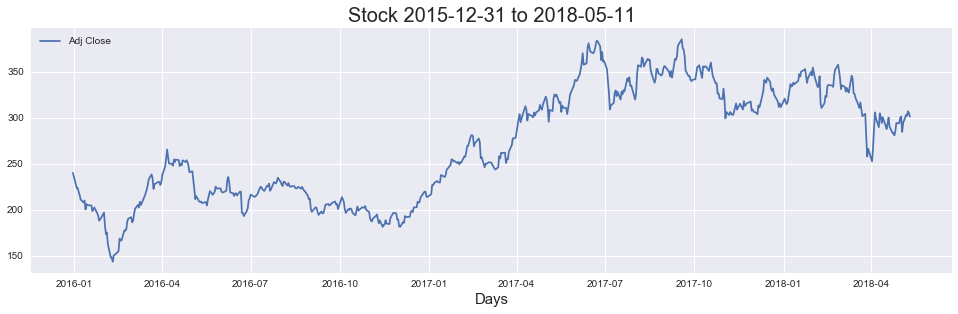

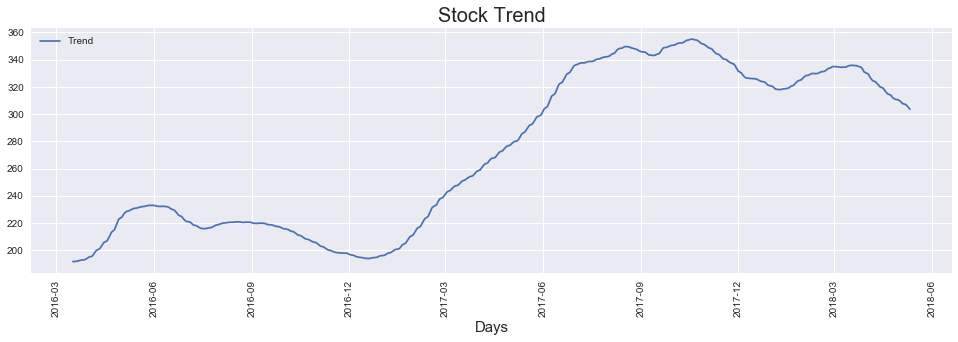

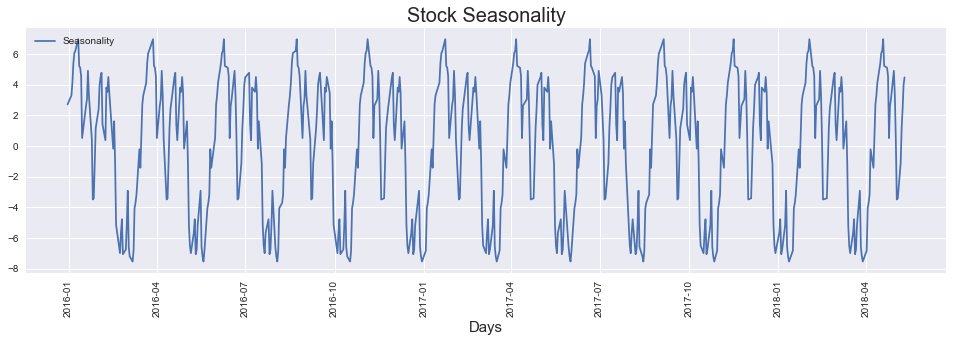

In [4]:
#Model 3- ARIMA MODEL timeseries model

import numpy as np
import pandas as pd
from pandas.core import datetools
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
import seaborn as sns
import statsmodels.tsa.api as smt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf, pacf

import pandas_datareader.data as data
#import pandas_datareader as data
import datetime  
#import pandas_datareader.data as web
#from datetime import datetime

start = datetime.datetime(2016, 1, 1)
end=datetime.datetime.today()

df_w=data.DataReader("TSLA", "yahoo", start, end)

df_w  = df_w[['Adj Close']]
plt.plot(df_w['Adj Close'],label = 'Adj Close')
plt.title('Stock '+ str(df_w.index[0]).split(' ')[0] +' to '+ str(df_w.index[-1]).split(' ')[0],fontsize=20)
plt.xlabel('Days', fontsize=15)
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(16.5, 4.5)
plt.show()
decomposition = seasonal_decompose(df_w,model='additive',two_sided = False,freq =52 )
trend = decomposition.trend
seasonal = decomposition.seasonal
resid = decomposition.resid
plt.plot(trend,label='Trend')
plt.xlabel('Days', fontsize=15)
plt.title('Stock Trend',fontsize=20)
plt.xticks(rotation=90)
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(16.5, 4.5)
plt.show()
plt.plot(seasonal,label='Seasonality')
plt.xlabel('Days', fontsize=15)
plt.title('Stock Seasonality',fontsize=20)
plt.xticks(rotation=90)
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(16.5, 4.5)
plt.show()

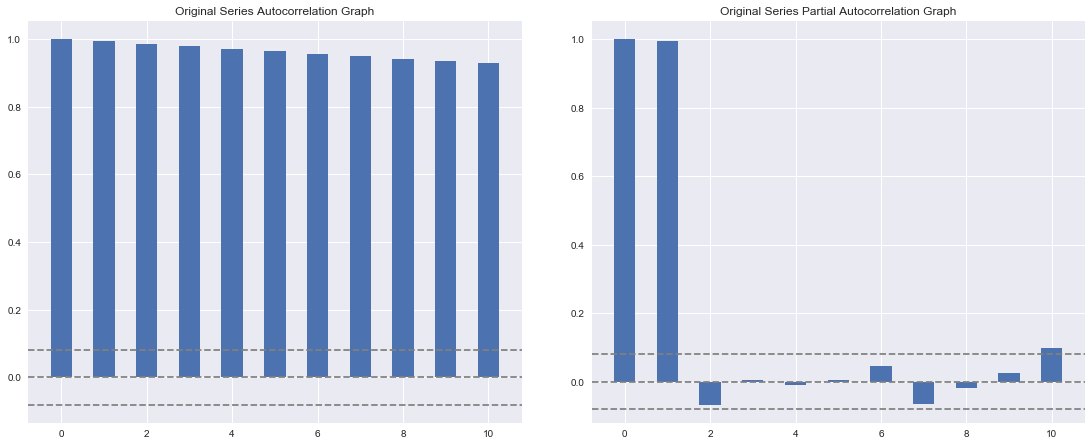

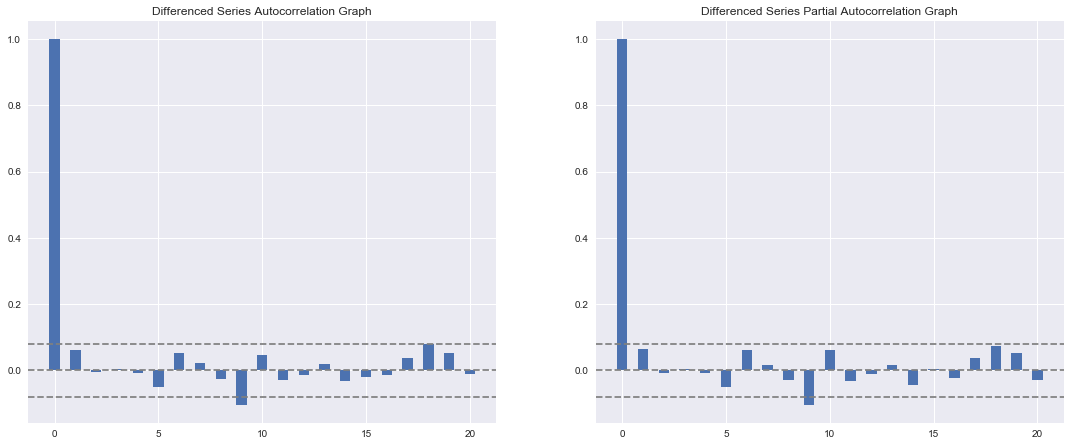

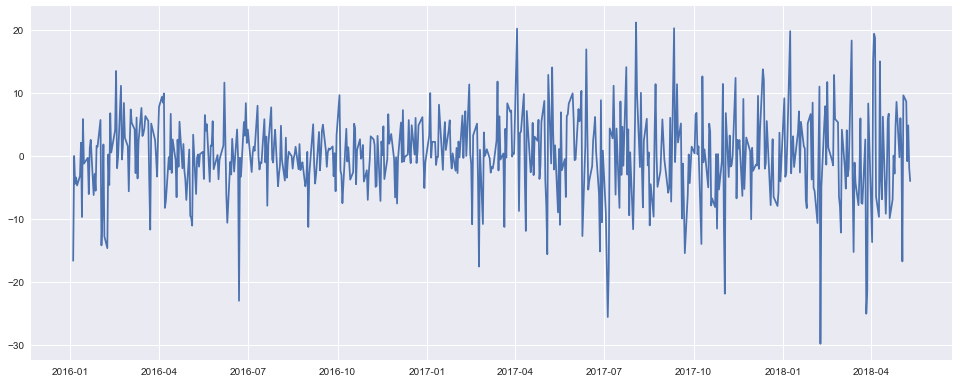

In [5]:
df_w = df_w[['Adj Close']]
lag_acf = acf(df_w, nlags=10)
lag_pacf = pacf(df_w, nlags=10, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.bar(range(len(lag_acf)), lag_acf, width=1/2)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_w)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_w)),linestyle='--',color='gray')
plt.title('Original Series Autocorrelation Graph')
#Plot PACF:
plt.subplot(122)
plt.bar(range(len(lag_pacf)), lag_pacf, width=1/2)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_w)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_w)),linestyle='--',color='gray')
plt.title('Original Series Partial Autocorrelation Graph')
plt.tight_layout()
fig = plt.gcf()
fig.set_size_inches(16.5, 6.5)
plt.show()

df_w_diff = df_w.diff(periods=1,axis=0) #pd.rolling_mean(df_w,1)
df_w_diff  = df_w_diff[1:]
lag_acf = acf(df_w_diff, nlags=20)
lag_pacf = pacf(df_w_diff, nlags=20, method='ols')
#Plot ACF: 
plt.subplot(121) 
plt.bar(range(len(lag_acf)), lag_acf, width=1/2)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_w_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_w_diff)),linestyle='--',color='gray')
plt.title('Differenced Series Autocorrelation Graph')
#Plot PACF:
plt.subplot(122)
plt.bar(range(len(lag_pacf)), lag_pacf, width=1/2)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_w_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_w_diff)),linestyle='--',color='gray')
plt.title('Differenced Series Partial Autocorrelation Graph')
plt.tight_layout()
fig = plt.gcf()
fig.set_size_inches(16.5, 6.5)
plt.show()

plt.plot(df_w_diff,label='De-Trend')
fig = plt.gcf()
fig.set_size_inches(16.5, 6.5)
plt.show()

The Mean Squared Error of our forecasts is 15.0


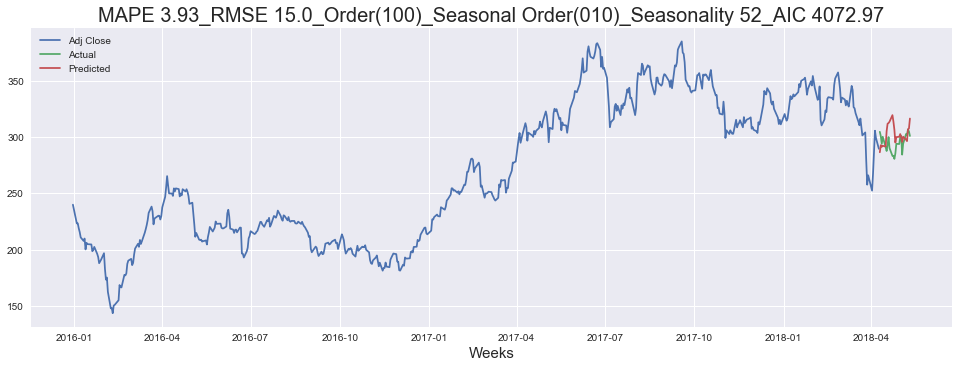

In [6]:
train = df_w['Adj Close'][0:-24]
test = df_w['Adj Close'][len(train):]

p =1 #nonseaosnal
d= 0
q = 0
pp = 0
dd = 1
qq = 0
z = 52 #seasonal order
aic = 'null'

amape = 99
af = []

try:
    model = smt.SARIMAX(train.asfreq(freq='1d'), exog=None, order=(p, d, q), seasonal_order=(pp,dd,qq,z),trend = 'n').fit()
    aic = model.aic
    aic = round(aic,2)
    pred = model.get_forecast(len(test))
    fcst = pred.predicted_mean
    fcst.index = test.index
    mapelist = []
    for i in range(len(fcst)):
                    mapelist.insert(i, (np.absolute(test[i] - fcst[i])) / test[i])
    mape = np.mean(mapelist) * 100
    mape = round(mape,2)
except:
    mape = 9999
    pass

amape = mape
sap  = p
sad = d
saq = q
app = pp
add = dd
aqq = qq
az = z
af= fcst
mse = mean_squared_error(test, af)
rmse = np.sqrt(mse)
rmse = round(rmse,1)

#mse = ((af - test) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(rmse))


plt.plot(train)
plt.plot(test,label='Actual')
plt.plot(af,label='Predicted')
fig = plt.gcf()
fig.set_size_inches(16.5, 5.5)
plt.title("MAPE "+str(amape)+"_"+"RMSE "+str(rmse)+"_"+"Order"+"("+str(sap)+str(sad)+str(saq)+")"+"_"+"Seasonal Order"
          +"("+str(app)+str(add)+str(aqq)+")"+"_"+"Seasonality "+str(az)+"_"+"AIC "+str(aic) ,fontsize=20)
plt.legend(loc='upper left')
plt.xlabel('Weeks', fontsize=15)
plt.show()

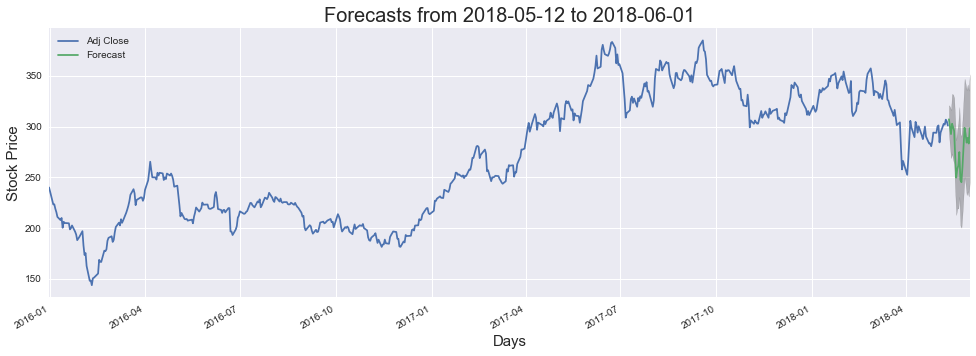

In [7]:
model = smt.SARIMAX(df_w.asfreq(freq='1d'), exog=None, order=(sap, sad, saq), seasonal_order=(app,add,aqq,az)).fit()
pred = model.get_forecast(21)
cf = pred.conf_int(alpha=0.05)
ax = df_w.plot(label='observed', figsize=(16.5, 5.5))
pred.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(cf.index, cf.iloc[:, 0],cf.iloc[:, 1], color='k', alpha=.25) #, label='confidence')
ax.set_xlabel('Days',fontsize = 15)
ax.set_ylabel('Stock Price',fontsize = 15)
plt.legend(loc='upper left')
plt.title("Forecasts from "+str(cf.index[0]).split(' ')[0]+" to "+str(cf.index[-1]).split(' ')[0],fontsize = 20)
plt.show()


In [8]:
fcst = pred.conf_int(alpha=0.05)
fcst['Forecast'] = pred.predicted_mean
fcst = fcst.round(1)
forecast = pd.DataFrame()
forecast['Lower Price'] = fcst.apply(lambda x: "{:,}".format(x['lower Adj Close']), axis=1)
forecast['Upper Price'] = fcst.apply(lambda x: "{:,}".format(x['upper Adj Close']), axis=1)
forecast['Forecast'] = fcst.apply(lambda x: "{:,}".format(x['Forecast']), axis=1)
forecast

,Lower Price,Upper Price,Forecast
2018-05-12,293.3,321.2,307.2
2018-05-13,280.5,319.5,300.0
2018-05-14,268.9,316.3,292.6
2018-05-15,273.4,332.3,302.9
2018-05-16,267.4,331.7,299.5
2018-05-17,263.2,328.3,295.8
2018-05-18,236.1,305.7,270.9
2018-05-19,212.9,286.6,249.7
2018-05-20,219.5,296.9,258.2
2018-05-21,219.3,303.7,261.5
